# Workshop on Neural Networks (CNN)

### Supervised Learning vs Unsupervised Learning!

Supervised learning is a learning in which we teach or train the machine using data which is well labeled that means some data is already tagged with correct answer. After that, machine is provided with new set of examples(data) so that supervised learning algorithm analyses the training data(set of training examples) and produces an correct outcome from labeled data. 

Supervised learning classified into two categories of algorithms:

![alt text](https://cdn-images-1.medium.com/max/800/1*ASYpFfDh7XnreU-ygqXonw.png "Logo Title Text 1")

Unsupervised learning is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of machine is to group unsorted information according to similarities, patterns and differences without any prior training of data.

![alt text](https://www.tutorialspoint.com/artificial_intelligence_with_python/images/clustering.jpg "Logo Title Text 1")


### What is a neuron? 

<img src=https://1.bp.blogspot.com/-f32OEk4VM_8/WQ4l45m7wUI/AAAAAAAAKZw/QfdbcWXzxJUJjAqInxVL0fYuwm1SGYlMwCLcB/s1600/Revision%2Bto%2BNN_2.jpg width="400">

Keeping aside Gradient descent Algorithm and Backpropagation algorithm, let's code a simple neural network using Keras that will learn the sin function, basically we are reverse engineering it using neural network. 


In [3]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib notebook 

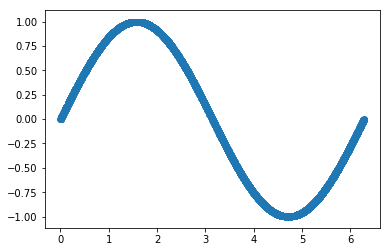

In [2]:
x = np.random.rand(5000)*(np.pi *2)
y = np.sin(x)

plt.figure(1)
plt.scatter(x,y)
plt.show()

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

network = Sequential()
network.add(Dense(5,input_dim=1,activation='relu'))
network.add(Dense(25,activation='relu'))
network.add(Dense(50,activation='relu'))
network.add(Dense(25,activation='relu'))
network.add(Dense(1))

network.compile(loss='mean_squared_error',optimizer='adam')

network.fit(x,y,epochs=100,batch_size=20,validation_split=0.2)

C:\Users\Karthika\Anaconda2\envs\jupyter36\lib\site-packages\ipykernel_launcher.py:13: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  del sys.path[0]


Train on 4000 samples, validate on 1000 samples
Epoch 1/100
4000/4000 [==============================] - 14s 4ms/step - loss: 0.2151 - val_loss: 0.1201
Epoch 2/100
4000/4000 [==============================] - 2s 419us/step - loss: 0.1171 - val_loss: 0.0903
Epoch 3/100
4000/4000 [==============================] - 2s 436us/step - loss: 0.0853 - val_loss: 0.0601
Epoch 4/100
4000/4000 [==============================] - 2s 417us/step - loss: 0.0601 - val_loss: 0.0432
Epoch 5/100
4000/4000 [==============================] - 2s 427us/step - loss: 0.0416 - val_loss: 0.0283
Epoch 6/100
4000/4000 [==============================] - 2s 414us/step - loss: 0.0240 - val_loss: 0.0169
Epoch 7/100
4000/4000 [==============================] - 2s 424us/step - loss: 0.0113 - val_loss: 0.0052
Epoch 8/100
4000/4000 [==============================] - 2s 421us/step - loss: 0.0041 - val_loss: 0.0017
Epoch 9/100
4000/4000 [==============================] - 2s 417us/step - loss: 0.0017 - val_loss: 0.0020
Epoch 10

4000/4000 [==============================] - 2s 417us/step - loss: 1.2956e-04 - val_loss: 3.2685e-05
Epoch 74/100
4000/4000 [==============================] - 2s 415us/step - loss: 1.8198e-04 - val_loss: 1.1425e-04
Epoch 75/100
4000/4000 [==============================] - 2s 421us/step - loss: 1.9118e-04 - val_loss: 5.6528e-05
Epoch 76/100
4000/4000 [==============================] - 2s 411us/step - loss: 1.7243e-04 - val_loss: 6.0447e-05
Epoch 77/100
4000/4000 [==============================] - 2s 408us/step - loss: 8.3773e-05 - val_loss: 7.8146e-05
Epoch 78/100
4000/4000 [==============================] - 2s 413us/step - loss: 8.6914e-05 - val_loss: 5.5913e-05
Epoch 79/100
4000/4000 [==============================] - 2s 414us/step - loss: 1.0586e-04 - val_loss: 1.5978e-04
Epoch 80/100
4000/4000 [==============================] - 2s 420us/step - loss: 1.6048e-04 - val_loss: 5.9493e-05
Epoch 81/100
4000/4000 [==============================] - 2s 414us/step - loss: 1.9364e-04 - val_loss

<IPython.core.display.Javascript object>


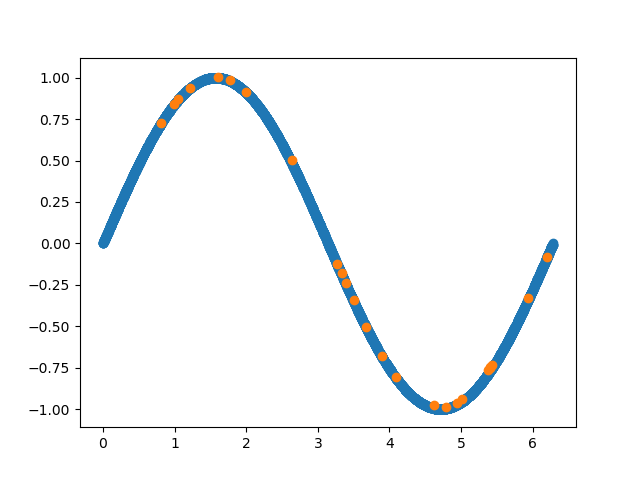

In [7]:
x_test = np.random.rand(25)*(np.pi*2)
y_pred = network.predict(x_test)

plt.figure(2)
plt.scatter(x, y)
plt.scatter(x_test,y_pred)
plt.show()

What do you think about the prediction? Do you think this is an overfit case? If so, how will you tackle it?

- By adding noise?
- Using Drop out?
- Using Regularisation?
- Reducing Sample data?
- Hyperparameter tuning? 

Shown below is one approach:

<IPython.core.display.Javascript object>


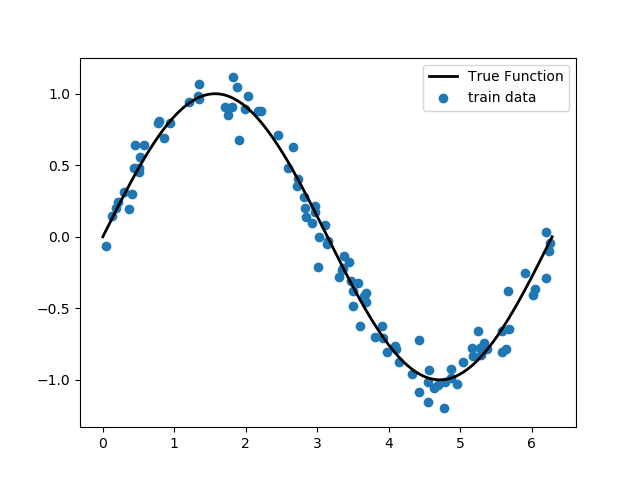

In [35]:
x = np.random.rand(100)*(np.pi *2)
y = np.sin(x) + 0.1*np.random.randn(100)

x_linspace = np.linspace(0, 1, 1000)*(np.pi *2)
y_true = np.sin(x_linspace)

plt.figure(1)
plt.plot(x_linspace, y_true, 'k-', linewidth = 2, label = 'True Function')
plt.scatter(x,y, label ='train data')
plt.legend()

In [40]:
network = Sequential()
network.add(Dense(10,input_dim=1,activation='relu'))
network.add(Dense(25,activation='relu'))
network.add(Dense(50,activation='relu'))
network.add(Dense(100,activation='relu'))
network.add(Dense(50,activation='relu'))
network.add(Dense(25,activation='relu'))
network.add(Dense(1))

network.compile(loss='mean_squared_error',optimizer='adam')

network.fit(x,y,epochs=100,batch_size=20,validation_split=0.2)

Train on 80 samples, validate on 20 samples
Epoch 1/100
80/80 [==============================] - 1s 18ms/step - loss: 0.4954 - val_loss: 0.4353
Epoch 2/100
80/80 [==============================] - 0s 623us/step - loss: 0.4170 - val_loss: 0.3875
Epoch 3/100
80/80 [==============================] - 0s 985us/step - loss: 0.3653 - val_loss: 0.3726
Epoch 4/100
80/80 [==============================] - 0s 846us/step - loss: 0.3441 - val_loss: 0.3666
Epoch 5/100
80/80 [==============================] - 0s 711us/step - loss: 0.3320 - val_loss: 0.3594
Epoch 6/100
80/80 [==============================] - 0s 856us/step - loss: 0.3211 - val_loss: 0.3387
Epoch 7/100
80/80 [==============================] - 0s 760us/step - loss: 0.3049 - val_loss: 0.3112
Epoch 8/100
80/80 [==============================] - 0s 711us/step - loss: 0.2985 - val_loss: 0.2904
Epoch 9/100
80/80 [==============================] - 0s 573us/step - loss: 0.2771 - val_loss: 0.2777
Epoch 10/100
80/80 [============================

80/80 [==============================] - 0s 549us/step - loss: 0.0102 - val_loss: 0.0212
Epoch 82/100
80/80 [==============================] - 0s 524us/step - loss: 0.0111 - val_loss: 0.0215
Epoch 83/100
80/80 [==============================] - 0s 623us/step - loss: 0.0096 - val_loss: 0.0192
Epoch 84/100
80/80 [==============================] - 0s 572us/step - loss: 0.0127 - val_loss: 0.0265
Epoch 85/100
80/80 [==============================] - 0s 661us/step - loss: 0.0114 - val_loss: 0.0202
Epoch 86/100
80/80 [==============================] - 0s 560us/step - loss: 0.0133 - val_loss: 0.0215
Epoch 87/100
80/80 [==============================] - 0s 611us/step - loss: 0.0132 - val_loss: 0.0403
Epoch 88/100
80/80 [==============================] - 0s 548us/step - loss: 0.0140 - val_loss: 0.0281
Epoch 89/100
80/80 [==============================] - 0s 573us/step - loss: 0.0179 - val_loss: 0.0484
Epoch 90/100
80/80 [==============================] - 0s 548us/step - loss: 0.0185 - val_loss: 

<IPython.core.display.Javascript object>


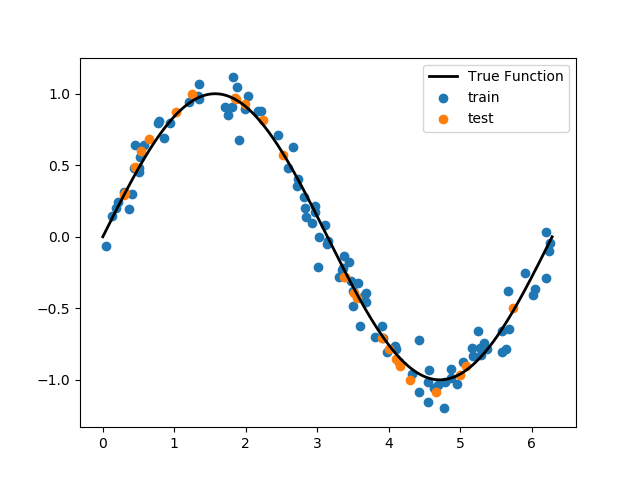

In [42]:
x_test = np.random.rand(25)*(np.pi*2)
y_pred = network.predict(x_test)

plt.figure(2)
plt.plot(x_linspace, y_true, 'k-', linewidth = 2, label = 'True Function')
plt.scatter(x, y, label ='train')
plt.scatter(x_test,y_pred, label ='test')
plt.legend()

# Convolutional Neural Network

### Why CNN?

Assuming that we have a set of color images in 4K Ultra HD, we will have 26,542,080 (4096 x 2160 x 3) different neurons connected to each other in the first layer which is not really manageable. Therefore, we can say that RegularNets are not scalable for image classification. So how does CNN help? Let's see the layers in CNN!

### Layers in CNN

1. Convolutional Layer

![alt text](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/more_images/Convolution_schematic.gif "Logo Title Text 1")

2. Pooling Layer

![alt text](https://cdn-images-1.medium.com/max/800/1*oVOUhBIi59Gb5w7eBzqYuA.png "Logo Title Text 1")

3. Fully Connected Layer

![alt text](https://cdn-images-1.medium.com/max/800/1*jYc7Hq9dU4kHXqm_Yd6vmw.png "Logo Title Text 1")

In summary:

![alt text](https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/jcr:content/mainParsys/image_copy.adapt.full.high.jpg/1497876372993.jpg "Logo Title Text 1")

Let's code a simple CNN using MNIST Dataset, which stands for Modified National Institute of Standards and Technology database.

In [43]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


<IPython.core.display.Javascript object>


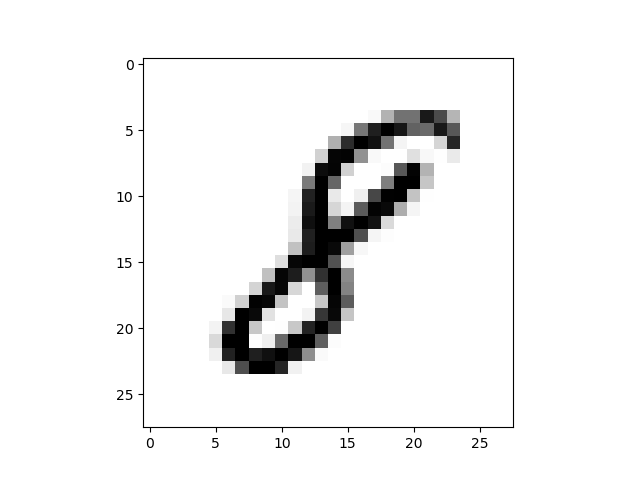

In [44]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [46]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [47]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [48]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 45s 749us/step - loss: 0.2174 - acc: 0.9355
Epoch 2/10
60000/60000 [==============================] - 41s 678us/step - loss: 0.0856 - acc: 0.9737
Epoch 3/10
60000/60000 [==============================] - 41s 682us/step - loss: 0.0589 - acc: 0.9820
Epoch 4/10
60000/60000 [==============================] - 41s 678us/step - loss: 0.0443 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 41s 680us/step - loss: 0.0357 - acc: 0.9879
Epoch 6/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0301 - acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 41s 676us/step - loss: 0.0242 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.0234 - acc: 0.9923
Epoch 9/10
60000/60000 [==============================] - 40s 668us/step - loss: 0.0185 - acc: 0.9941
Epoch 10/10
60000/60000 [==============================] - 40s 673us/step - loss: 

In [49]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 244us/step


[0.05892673691256441, 0.9859]

<IPython.core.display.Javascript object>


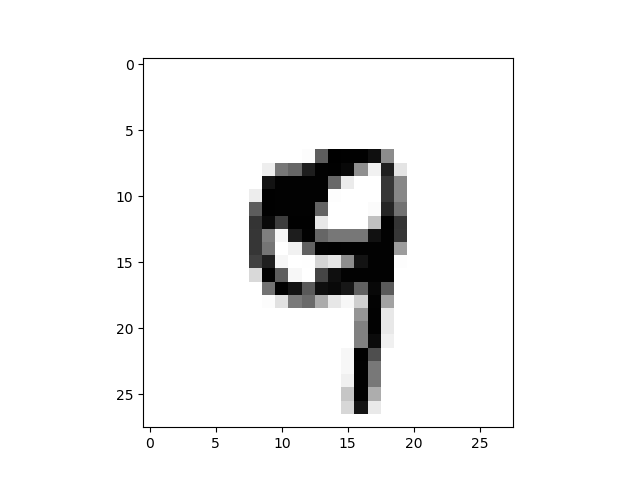

9


In [50]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

Above code reference: https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

Now let us take a use-case where the challenge is to create a model that predicts the presence of oil palm plantations in satellite imagery. [Refer this notebook] (https://github.com/KK945/ML-Practise/blob/master/WiDSDatathon2019.ipynb) 

## Do you think AI can match Human skills? Are they there yet? 

Do you understand this? 

![alt text](https://cdn-images-1.medium.com/max/800/1*opK_rsxQuWOJQsBWdVYBBw.png "Logo Title Text 1")

Now, do you? 

![alt text](https://cdn-images-1.medium.com/max/800/1*Byjtj3ceHC3QlzgEyihXOQ.png "Logo Title Text 1")

Humans do good at recognising objects that are severely blocked and it is difficult to fool a human. So, there is fundamental difference between machine and human vision perceptions and this gap is what every major AI tech company is working on to close. 

### Thank you

Resources:
